In [2]:
# Based on https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations/notebook
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd
import numpy as np

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Next, we'll load the train and test dataset, which is in the "../input/" directory
train = pd.read_csv("../input/train.csv") # the train dataset is now a Pandas DataFrame
test = pd.read_csv("../input/test.csv") # the train dataset is now a Pandas DataFrame

# Let's see what's in the trainings data - Jupyter notebooks print the result of the last thing you do
train.head()

# Press shift+enter to execute this cell

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [5]:
# happy customers have TARGET==0, unhappy custormers have TARGET==1
# A little less then 4% are unhappy => unbalanced dataset
df = pd.DataFrame(train.TARGET.value_counts())
df['Percentage'] = 100*df['TARGET']/train.shape[0]
df

,TARGET,Percentage
0,73012,96.043147
1,3008,3.956853


In [6]:
# Top-10 most common values
train.var3.value_counts()[:10]

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [7]:
# 116 values in column var3 are -999999
# var3 is suspected to be the nationality of the customer
# -999999 would mean that the nationality of the customer is unknown
train.loc[train.var3==-999999].shape

(116, 371)

In [8]:
# Replace -999999 in var3 column with most common value 2 
# See https://www.kaggle.com/cast42/santander-customer-satisfaction/debugging-var3-999999
# for details
train = train.replace(-999999,2)
train.loc[train.var3==-999999].shape

(0, 371)

In [9]:
X = train.iloc[:,:-1]
y = train.TARGET

X['n0'] = (X==0).sum(axis=1)
train['n0'] = X['n0']

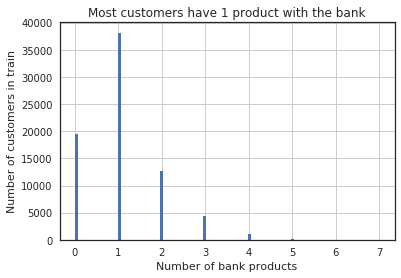

In [10]:
# According to dmi3kno (see https://www.kaggle.com/cast42/santander-customer-satisfaction/exploring-features/comments#115223)
# num_var4 is the number of products. Let's plot the distribution:
train.num_var4.hist(bins=100)
plt.xlabel('Number of bank products')
plt.ylabel('Number of customers in train')
plt.title('Most customers have 1 product with the bank')
plt.show()

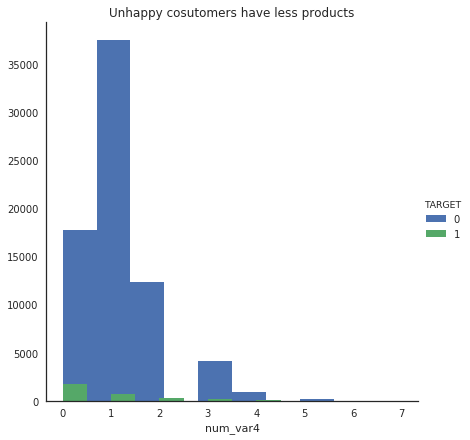

In [11]:
# Let's look at the density of the of happy/unhappy customers in function of the number of bank products
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(plt.hist, "num_var4") \
   .add_legend()
plt.title('Unhappy cosutomers have less products')
plt.show()

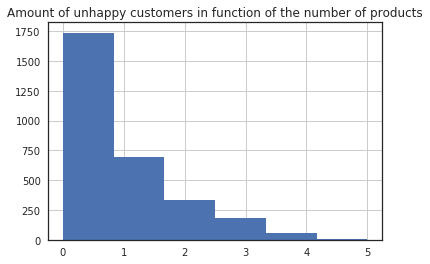

In [12]:
train[train.TARGET==1].num_var4.hist(bins=6)
plt.title('Amount of unhappy customers in function of the number of products');

In [13]:
train.var38.describe()

count    7.602000e+04
mean     1.172358e+05
std      1.826646e+05
min      5.163750e+03
25%      6.787061e+04
50%      1.064092e+05
75%      1.187563e+05
max      2.203474e+07
Name: var38, dtype: float64

In [14]:
# How is var38 looking when customer is unhappy ?
train.loc[train['TARGET']==1, 'var38'].describe()

count    3.008000e+03
mean     9.967828e+04
std      1.063098e+05
min      1.113663e+04
25%      5.716094e+04
50%      8.621997e+04
75%      1.173110e+05
max      3.988595e+06
Name: var38, dtype: float64

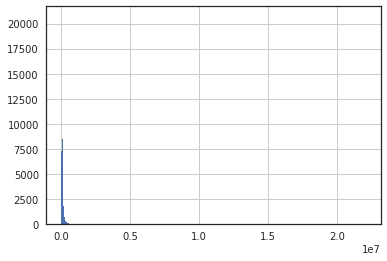

In [15]:
# Histogram for var 38 is not normal distributed
train.var38.hist(bins=1000);

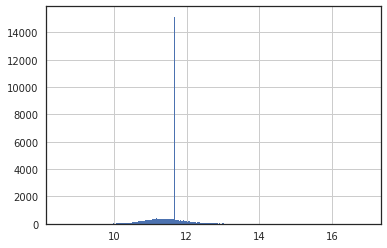

In [16]:
train.var38.map(np.log).hist(bins=1000);


In [17]:
# where is the spike between 11 and 12  in the log plot ?
train.var38.map(np.log).mode()

0    11.672584
dtype: float64

In [18]:
# What are the most common values for var38 ?
train.var38.value_counts()

117310.979016    14868
451931.220000       16
463625.160000       12
288997.440000       11
104563.800000       11
236690.340000        8
329603.970000        7
104644.410000        7
67088.310000         7
125722.440000        7
128318.520000        7
97639.560000         6
100466.730000        6
70813.800000         6
163432.470000        6
168733.620000        6
105260.880000        6
185385.690000        6
85814.040000         5
235476.720000        5
121603.020000        5
93037.680000         5
63820.890000         5
33184.020000         5
126065.040000        5
71302.530000         5
208961.790000        5
171932.700000        5
131353.470000        5
127141.500000        5
                 ...  
59680.710000         1
46170.180000         1
75729.810000         1
92730.750000         1
98087.700000         1
31312.410000         1
151944.720000        1
49222.200000         1
46682.640000         1
79753.740000         1
217717.530000        1
156462.240000        1
140446.5900

In [19]:
# the most common value is very close to the mean of the other values
train.var38[train['var38'] != 117310.979016494].mean()

117217.53330847724

In [20]:
# what if we exclude the most common value
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].value_counts()

451931.22    16
463625.16    12
288997.44    11
104563.80    11
236690.34     8
67088.31      7
125722.44     7
128318.52     7
104644.41     7
329603.97     7
105260.88     6
97639.56      6
168733.62     6
185385.69     6
70813.80      6
100466.73     6
163432.47     6
121603.02     5
126065.04     5
185784.72     5
131353.47     5
85814.04      5
83174.28      5
227397.72     5
229351.65     5
208961.79     5
192920.76     5
63820.89      5
71302.53      5
127141.50     5
             ..
44652.87      1
145842.48     1
72912.24      1
130840.20     1
140825.16     1
43512.54      1
76419.75      1
45131.22      1
151250.37     1
105473.79     1
114203.55     1
267128.67     1
64010.01      1
147754.38     1
72751.74      1
94550.37      1
73657.20      1
154776.33     1
72289.59      1
91865.67      1
75781.11      1
72750.24      1
46205.43      1
176834.07     1
25224.75      1
384796.59     1
108436.56     1
41489.49      1
90218.19      1
153559.74     1
Name: var38, Length: 577

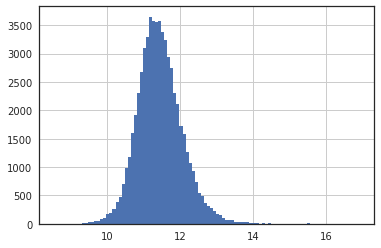

In [21]:
# Look at the distribution
train.loc[~np.isclose(train.var38, 117310.979016), 'var38'].map(np.log).hist(bins=100);

In [22]:
# Above plot suggest we split up var38 into two variables
# var38mc == 1 when var38 has the most common value and 0 otherwise
# logvar38 is log transformed feature when var38mc is 0, zero otherwise
train['var38mc'] = np.isclose(train.var38, 117310.979016)
train['logvar38'] = train.loc[~train['var38mc'], 'var38'].map(np.log)
train.loc[train['var38mc'], 'logvar38'] = 0

In [23]:
#Check for nan's
print('Number of nan in var38mc', train['var38mc'].isnull().sum())
print('Number of nan in logvar38',train['logvar38'].isnull().sum())

Number of nan in var38mc 0
Number of nan in logvar38 0


In [24]:
train['var15'].describe()

count    76020.000000
mean        33.212865
std         12.956486
min          5.000000
25%         23.000000
50%         28.000000
75%         40.000000
max        105.000000
Name: var15, dtype: float64

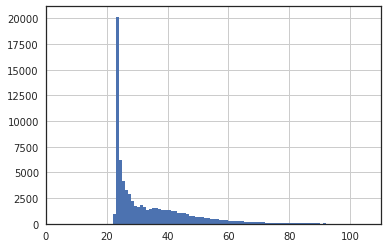

In [25]:
#Looks more normal, plot the histogram
train['var15'].hist(bins=100);

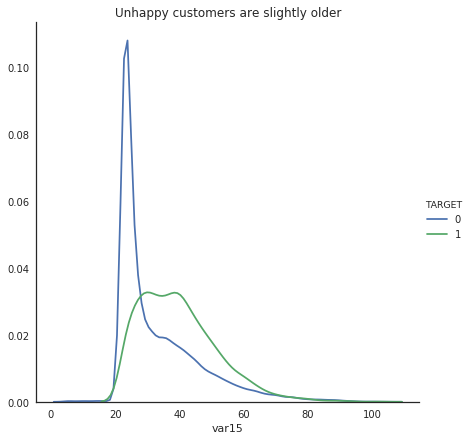

In [26]:
# Let's look at the density of the age of happy/unhappy customers
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "var15") \
   .add_legend()
plt.title('Unhappy customers are slightly older');

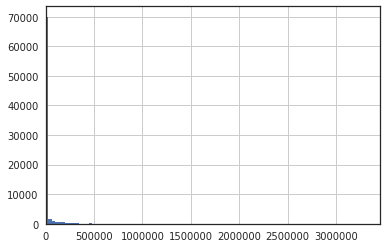

In [27]:
train.saldo_var30.hist(bins=100)
plt.xlim(0, train.saldo_var30.max());


In [28]:
# improve the plot by making the x axis logarithmic
train['log_saldo_var30'] = train.saldo_var30.map(np.log)

ValueError: array must not contain infs or NaNs

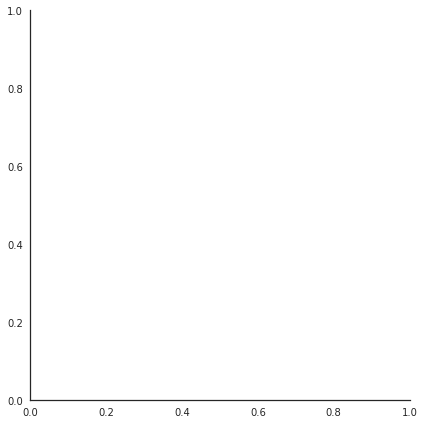

In [29]:
# Let's look at the density of the age of happy/unhappy customers for saldo_var30
sns.FacetGrid(train, hue="TARGET", size=6) \
   .map(sns.kdeplot, "log_saldo_var30") \
   .add_legend();